In [ ]:
!pip install wget
!pip install transformers datasets evaluate

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=7eda1cf1c9a471d2410a49dfdfa90a7f07c24ca630103da65ffea5a66b00085c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
import os
import re
from pathlib import Path
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
import wget
%matplotlib inline

## Libraries:

Numpy: http://www.numpy.org/

Pandas: https://pandas.pydata.org/

Scikit-learn: http://scikit-learn.org/stable/

SciPy: https://www.scipy.org/

Transformers: https://huggingface.co/docs/transformers/index

## 20 newsgroups dataset

In [ ]:
filename = wget.download("https://github.com/MIE451-1513-2023/course-datasets/raw/main/20_newsgroups.zip", "20_newsgroups.zip")

In [ ]:
!unzip 20_newsgroups

Streaming output truncated to the last 5000 lines.
  inflating: 20_newsgroups/talk.politics.guns/54588  
  inflating: 20_newsgroups/talk.politics.guns/54127  
  inflating: 20_newsgroups/talk.politics.guns/53302  
  inflating: 20_newsgroups/talk.politics.guns/54315  
  inflating: 20_newsgroups/talk.politics.guns/54771  
  inflating: 20_newsgroups/talk.politics.guns/54543  
  inflating: 20_newsgroups/talk.politics.guns/55233  
  inflating: 20_newsgroups/talk.politics.guns/55039  
  inflating: 20_newsgroups/talk.politics.guns/54749  
  inflating: 20_newsgroups/talk.politics.guns/55234  
  inflating: 20_newsgroups/talk.politics.guns/54782  
  inflating: 20_newsgroups/talk.politics.guns/54544  
  inflating: 20_newsgroups/talk.politics.guns/54312  
  inflating: 20_newsgroups/talk.politics.guns/54120  
  inflating: 20_newsgroups/talk.politics.guns/53305  
  inflating: 20_newsgroups/talk.politics.guns/54915  
  inflating: 20_newsgroups/talk.politics.guns/54129  
  inflating: 20_newsgroups/talk

In [ ]:
DATA_DIR = "20_newsgroups"

In [ ]:
os.listdir(DATA_DIR)

['rec.motorcycles',
 'comp.sys.ibm.pc.hardware',
 'sci.electronics',
 'misc.forsale',
 'sci.med',
 'talk.politics.guns',
 'sci.crypt',
 'alt.atheism',
 'talk.politics.misc',
 'comp.sys.mac.hardware',
 'talk.religion.misc',
 'comp.windows.x',
 'soc.religion.christian',
 'rec.sport.baseball',
 'sci.space',
 'talk.politics.mideast',
 'comp.graphics',
 'rec.autos',
 'comp.os.ms-windows.misc',
 'rec.sport.hockey']

In [ ]:
os.listdir(os.path.join(DATA_DIR, "rec.autos"))

['102784',
 '103044',
 '103083',
 '101576',
 '102957',
 '103778',
 '103692',
 '102946',
 '103698',
 '103109',
 '103762',
 '102869',
 '103295',
 '103342',
 '102923',
 '103128',
 '102818',
 '103059',
 '103158',
 '103093',
 '103293',
 '102895',
 '103202',
 '103157',
 '103140',
 '103101',
 '102916',
 '103222',
 '102938',
 '101678',
 '103064',
 '102856',
 '102779',
 '102858',
 '103754',
 '101662',
 '103774',
 '103375',
 '103060',
 '102822',
 '102970',
 '103775',
 '103049',
 '103509',
 '102925',
 '103408',
 '103080',
 '103416',
 '103022',
 '103320',
 '103085',
 '102986',
 '103309',
 '103507',
 '103776',
 '103438',
 '101681',
 '103726',
 '102827',
 '103055',
 '103361',
 '103673',
 '103326',
 '103165',
 '103188',
 '103051',
 '103196',
 '103167',
 '102874',
 '103323',
 '101564',
 '103669',
 '102992',
 '101605',
 '102771',
 '103032',
 '103265',
 '103750',
 '102780',
 '103373',
 '102795',
 '103015',
 '103146',
 '102797',
 '102830',
 '102977',
 '103003',
 '103267',
 '103706',
 '103263',
 '101565',

In [ ]:
print(open(os.path.join(DATA_DIR, "rec.autos", "103070"), "r").read())

Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gatech!howland.reston.ans.net!usenet.ins.cwru.edu!po.CWRU.Edu!aas7
From: aas7@po.CWRU.Edu (Andrew A. Spencer)
Newsgroups: rec.autos
Subject: Re: Manual Shift Bigots
Date: 22 Apr 1993 01:14:18 GMT
Organization: Case Western Reserve University, Cleveland, OH (USA)
Lines: 29
Message-ID: <1r4rha$98b@usenet.INS.CWRU.Edu>
References: <C5LIw2.CAx@news.rich.bnr.ca> <Apr17.054325.15482@engr.washington.edu> <crh.735198797@regent.e-technik.tu-muenchen.de> <Apr19.195700.19699@engr.washington.edu> <1993Apr21.100149.1501@rtsg.mot.com> <1993Apr21.184447.19630@bnr.ca>
Reply-To: aas7@po.CWRU.Edu (Andrew A. Spencer)
NNTP-Posting-Host: slc5.ins.cwru.edu


In a previous article, dwjz@bnr.ca (Doug Zolmer) says:

>In article <1993Apr21.100149.1501@rtsg.mot.com>, kissane@black.Berkeley.EDU (John G. Kissane) writes:
>|> As a matter of interest does anyone know why autos are so popular in the US while 
>|> here in Europe they are rare??? Just wondering.....
>
>In 

In [ ]:
# build a list of paths of all files
all_files = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]

In [ ]:
len(all_files)

19997

In [ ]:
all_files[:5]

[PosixPath('20_newsgroups/rec.motorcycles/104849'),
 PosixPath('20_newsgroups/rec.motorcycles/104825'),
 PosixPath('20_newsgroups/rec.motorcycles/104524'),
 PosixPath('20_newsgroups/rec.motorcycles/104405'),
 PosixPath('20_newsgroups/rec.motorcycles/104618')]

## Building a feature set for classification

### Finding the most common words

In [ ]:
def clean_file_text(text):
    new_text = re.sub("Newsgroups:.*?\n", "", text)
    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Path:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)
    return new_text

def corpus_count_words(file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            word_counter.update(file_words)
    return word_counter

In [ ]:
news_cnt = corpus_count_words(all_files)

In [ ]:
news_cnt.most_common(10)

[('the', 227359),
 ('to', 126510),
 ('of', 120164),
 ('a', 100558),
 ('and', 96676),
 ('I', 89455),
 ('is', 72055),
 ('in', 68295),
 ('that', 67484),
 ('AX', 62406)]

We use two feature set, small and large. The small feature set consists of 100 most frequent words and the large feature set consists of 500 most frequent words.

In [ ]:
num_words = 100
top_words_small = [word for (word, freq) in news_cnt.most_common(num_words)]
print(top_words_small)

num_words = 500
top_words_large = [word for (word, freq) in news_cnt.most_common(num_words)]
print(top_words_large)

['the', 'to', 'of', 'a', 'and', 'I', 'is', 'in', 'that', 'AX', 'edu', 'it', 'for', 'you', 'on', 'be', 'com', 's', 'have', 'are', 'not', 'with', 't', 'The', 'this', '1', 'as', 'or', 'was', 'From', 'Subject', 'ID', 'Message', 'Lines', 'Organization', 'they', 'but', 'by', 'can', 'In', 'from', 'at', '2', 'an', 'would', '0', 'will', 'writes', '3', 'about', 'if', 'Re', 'all', 'one', 'my', 'do', 'there', 'References', 'what', 'has', 'article', 'X', 'we', 'your', 'news', 'M', 'me', 'A', 'Sender', 'who', 'It', 'no', 'out', 'any', 'he', 'which', 'so', 'some', 'like', 'people', 'were', '4', 'University', 'If', 'more', 'their', 'don', '5', 'up', 'know', 'Posting', 'Host', 'them', 'just', 'other', 'than', 'get', 'had', 'only', 'been']
['the', 'to', 'of', 'a', 'and', 'I', 'is', 'in', 'that', 'AX', 'edu', 'it', 'for', 'you', 'on', 'be', 'com', 's', 'have', 'are', 'not', 'with', 't', 'The', 'this', '1', 'as', 'or', 'was', 'From', 'Subject', 'ID', 'Message', 'Lines', 'Organization', 'they', 'but', 'by'

### Create a binary encoding of dataset based on the selected features (X)

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
df_rows = []
for file_path in all_files:
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        file_data = file.read()
        file_data = clean_file_text(file_data)
        file_words = set(tokenizer.tokenize(file_data))
        df_rows.append([1 if word in file_words else 0 for word in top_words_small])
X_small = pd.DataFrame(df_rows, columns = top_words_small)


In [ ]:

df_rows = []
for file_path in all_files:
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        file_data = file.read()
        file_data = clean_file_text(file_data)
        file_words = set(tokenizer.tokenize(file_data))
        df_rows.append([1 if word in file_words else 0 for word in top_words_large])
X_large = pd.DataFrame(df_rows, columns = top_words_large)

In [ ]:
file_words

{'162011',
 '1993Apr23',
 '23',
 '29720',
 'And',
 'Are',
 'Bros',
 'But',
 'Carnegie',
 'Engineering',
 'Equip',
 'Fabulous',
 'Freak',
 'From',
 'Furry',
 'Having',
 'Hey',
 'Hockey',
 'However',
 'I',
 'ID',
 'Institute',
 'Keywords',
 'Lines',
 'Mellon',
 'Menner',
 'Message',
 'Netnews',
 'Organization',
 'PA',
 'Pittsburgh',
 'Recommendations',
 'Sender',
 'So',
 'Software',
 'Subject',
 'That',
 'Thomas',
 'Tom',
 'University',
 'When',
 'a',
 'actually',
 'advantages',
 'am',
 'an',
 'and',
 'any',
 'appreciated',
 'are',
 'as',
 'at',
 'bad',
 'basis',
 'be',
 'before',
 'bites',
 'brands',
 'but',
 'catalogs',
 'checked',
 'cheek',
 'cmu',
 'college',
 'comes',
 'comments',
 'comparison',
 'completely',
 'couple',
 'creek',
 'different',
 'disadvantages',
 'down',
 'edu',
 'eel',
 'equipment',
 'etc',
 'example',
 'football',
 'for',
 'girdles',
 'greatly',
 'have',
 'having',
 'high',
 'hockey',
 'hoping',
 'ignorant',
 'in',
 'invest',
 'it',
 'kinds',
 'learning',
 'least'

In [ ]:
X_small.head()

,the,to,of,a,and,I,is,in,that,AX,...,Posting,Host,them,just,other,than,get,had,only,been
0,1,1,1,1,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,1,1,0,1,1,1,1,0,...,1,1,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,1,1,1,0,...,1,1,0,0,0,0,1,0,1,1
4,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,0,0,0,1


In [ ]:
X_large.head()

,the,to,of,a,and,I,is,in,that,AX,...,saying,human,info,Paul,change,American,SCSI,FBI,Also,Do
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,1,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Build a targets list (y)

In [ ]:
def get_topic_name(file_path):
    return file_path.parent.name

def get_target(topic_name):
    topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball',
     'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc',
     'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
     'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']
    return topics.index(topic_name)

In [ ]:
# Create a dataframe of targets (y)
y = [get_target(get_topic_name(file_path)) for file_path in all_files]

In [ ]:
y[:10]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [ ]:
len(y)

19997

### Run Logistic Regression

In [ ]:
# split dataset to train and test set
X_large_train, X_large_test, y_train, y_test = train_test_split(X_large, y, test_size=0.3, random_state=42)
X_small_train, X_small_test, y_train, y_test = train_test_split(X_small, y, test_size=0.3, random_state=42)

In [ ]:
clf_small = LogisticRegression(C=1.0).fit(X_small_train, y_train)
clf_large = LogisticRegression(C=1.0).fit(X_large_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# predict on train and test set
y_train_predict_small = clf_small.predict(X_small_train)
y_test_predict_small = clf_small.predict(X_small_test)

y_train_predict_large = clf_large.predict(X_large_train)
y_test_predict_large = clf_large.predict(X_large_test)

In [ ]:
# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict_large)
test_accuracy = accuracy_score(y_test, y_test_predict_large)
# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.756162034721726
Test accuracy: 0.5818333333333333


In [ ]:
# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict_small)
test_accuracy = accuracy_score(y_test, y_test_predict_small)
# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.3412159748517539
Test accuracy: 0.31633333333333336


### Confusion matrix

In [ ]:
cm_large = confusion_matrix(y_test, y_test_predict_large)
pd.DataFrame(cm_large)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,223,3,5,6,6,0,2,2,10,37,1,3,0,0,2,5,4,0,1,7
1,4,179,7,6,10,1,2,2,11,3,19,2,3,4,14,10,8,0,13,3
2,4,8,111,2,5,9,4,5,8,1,7,10,24,48,14,3,6,0,18,3
3,5,5,2,164,4,0,3,5,10,16,3,2,2,1,3,4,6,0,0,71
4,3,5,9,1,195,1,48,1,7,5,8,3,4,1,3,2,4,0,5,1
5,0,2,13,4,3,167,4,5,1,0,5,10,24,29,6,1,3,0,2,1
6,3,3,2,6,31,2,202,0,4,5,5,2,0,2,1,5,3,0,4,1
7,2,5,6,3,2,1,2,210,6,8,6,4,7,2,5,12,7,0,3,6
8,8,9,15,10,7,3,6,5,139,7,15,10,14,5,18,3,9,0,6,7
9,21,7,4,9,9,0,9,13,8,142,8,2,1,0,1,39,8,0,3,33


In [ ]:
cm_small = confusion_matrix(y_test, y_test_predict_small)
pd.DataFrame(cm_small)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,123,6,8,18,8,1,13,12,10,33,6,3,3,0,4,18,15,2,10,24
1,5,50,16,6,18,15,30,18,10,6,28,7,9,19,9,25,11,2,12,5
2,3,7,44,1,6,21,19,10,6,1,24,23,19,32,19,9,13,0,29,4
3,16,9,4,84,11,3,15,21,12,20,4,12,4,0,4,12,12,7,2,54
4,8,10,7,13,103,6,45,5,7,12,18,6,10,1,4,10,13,4,18,6
5,3,6,23,6,14,80,11,7,6,3,10,28,18,20,10,4,13,1,14,3
6,7,1,6,2,29,15,104,4,6,8,15,11,6,3,9,9,15,2,23,6
7,24,12,2,16,3,4,6,98,9,12,25,11,10,4,9,14,14,0,4,20
8,9,17,16,33,11,10,8,13,45,14,13,8,13,13,9,7,17,10,12,18
9,48,11,4,26,13,4,14,22,8,53,13,5,1,1,6,37,9,3,8,31


In [ ]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)

    # add labels for all targets
    numTargets = cm.shape[0]
    plt.xticks(list(range(numTargets+1)))
    plt.yticks(list(range(numTargets+1)))

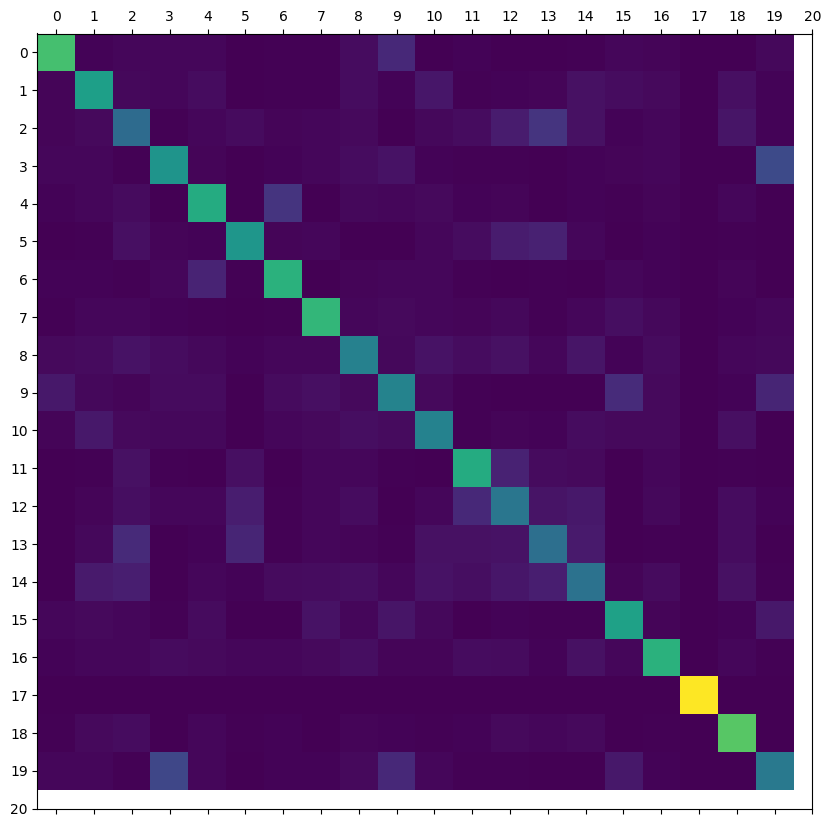

In [ ]:
plot_confusion_matrix(cm_large)

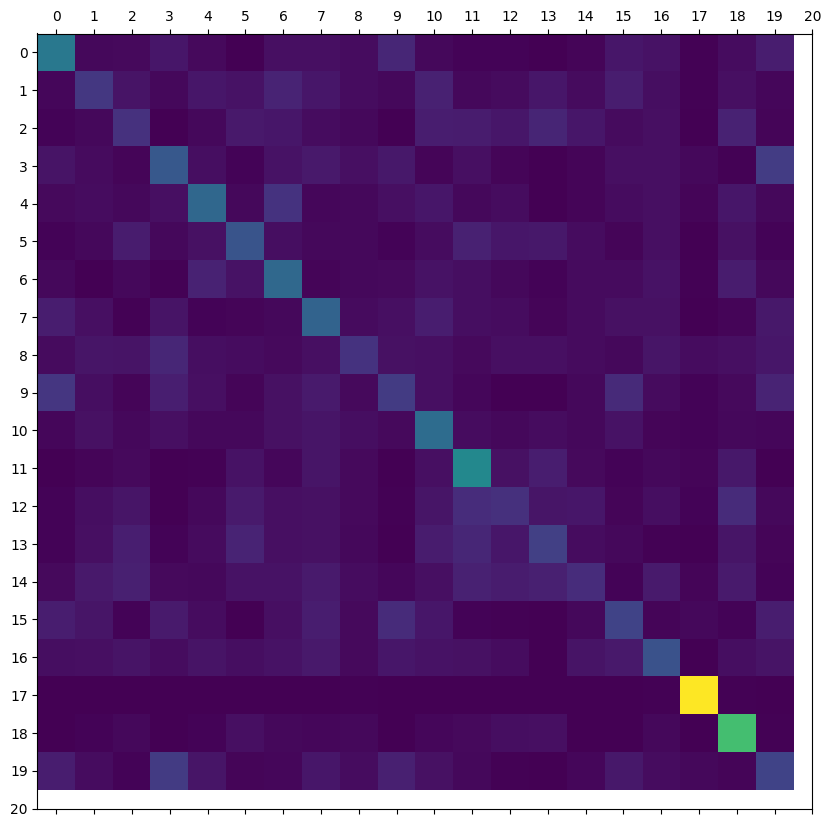

In [ ]:
plot_confusion_matrix(cm_small)

# Transformer based

Prepare the text data

In [ ]:

texts = []
for file_path in all_files:
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        file_data = file.read()
        file_data = clean_file_text(file_data)
        texts.append(file_data)

In [ ]:
len(texts)

19997

In [ ]:
y = [get_target(get_topic_name(file_path)) for file_path in all_files]

In [ ]:
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, y, test_size=0.3, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.2, random_state=42)

We use Distilbert. Any base model from Hugginface can be use in a similar fashion. you can find more models at [Hugginface hub](https://huggingface.co/models?pipeline_tag=fill-mask&sort=trending)

In [ ]:
model_name = 'distilbert-base-uncased'

Now we can simply pass our texts to the tokenizer. We’ll pass truncation=True and padding=True which will ensure that all of our sequences are truncated to be no longer model’s maximum input length and padded if neccessary. This will allow us to feed batches of sequences into the model at the same time.

In [ ]:
from transformers import AutoTokenizer
import torch
bert_tokenizer = AutoTokenizer.from_pretrained(model_name)

We tokenize the text data. We don't want to truncate texts that are larger than 512 tokens, so we split the tokens into chunks. (credit goes to https://towardsdatascience.com/how-to-apply-transformers-to-any-length-of-text-a5601410af7f )


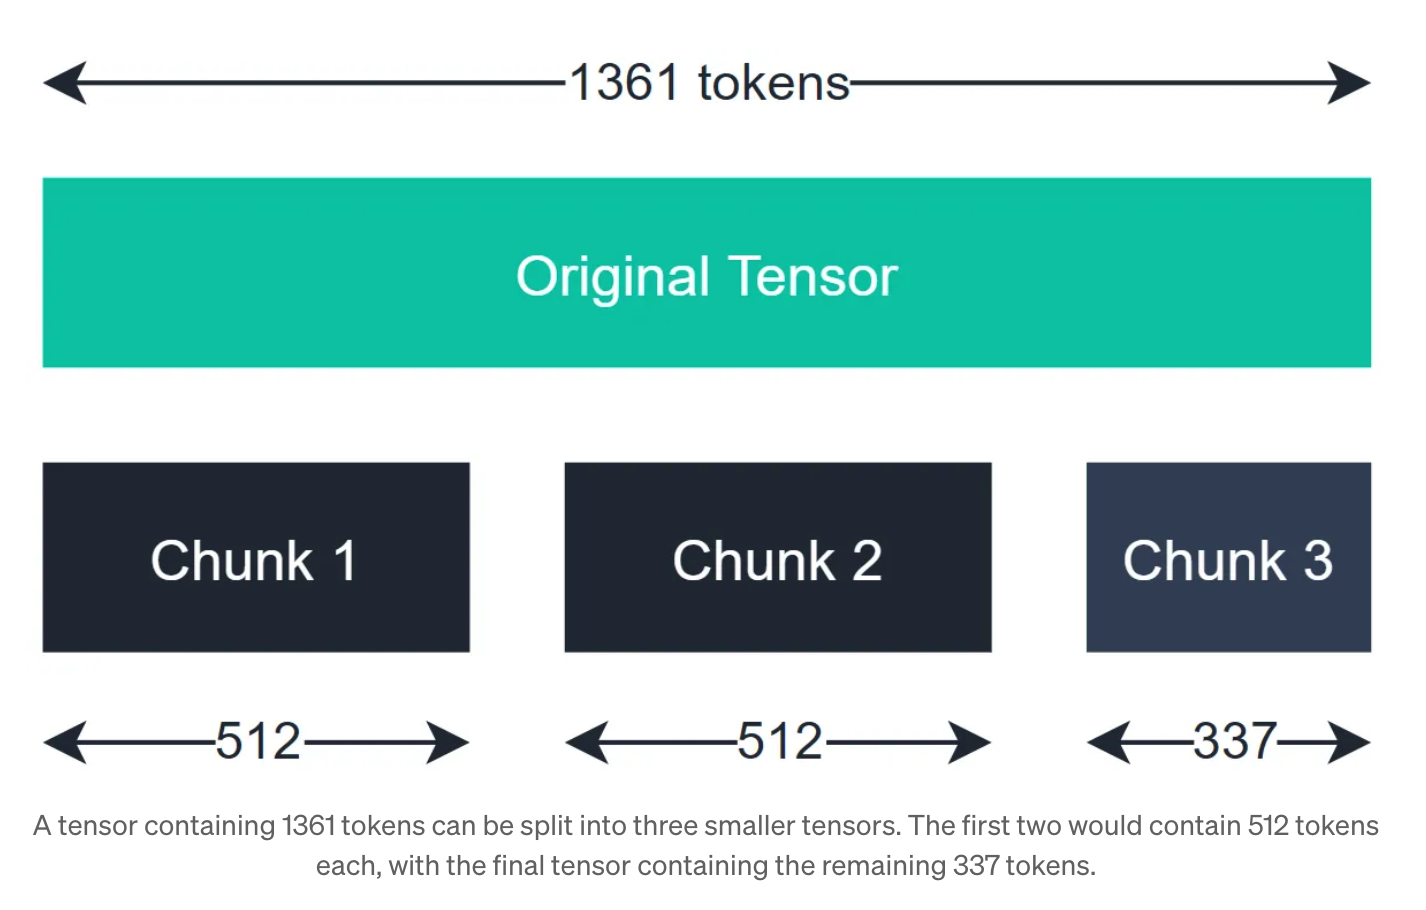

In [ ]:
def tokenize_without_truncation(texts_list, labels_list):
  input_ids_list = []
  masks = []
  labels = []
  for txt,lbl in zip(texts_list,labels_list): # looping over all of our text data


    tokens = bert_tokenizer.encode_plus(txt,add_special_tokens=False, return_tensors='pt')
    input_id_chunks = tokens['input_ids'][0].split(510)
    mask_chunks = tokens['attention_mask'][0].split(510)

    input_id_chunks = list(input_id_chunks)
    mask_chunks = list(mask_chunks)
    # we add a for-loop where we add our [CLS] and [SEP] tokens
    for i in range(len(input_id_chunks)):
      input_id_chunks[i] = torch.cat([torch.Tensor([101]), input_id_chunks[i], torch.Tensor([102])]) # [CLS] tokens [SEP]
      mask_chunks[i] = torch.cat([torch.Tensor([1]), mask_chunks[i], torch.Tensor([1])])

      ## To check if a chunk requires padding, we add an if-statement that checks the tensor length.
      ## If the tensor is shorter than 512 tokens, we add padding using the torch.cat function.

      # get required padding length
      pad_len = 512 - input_id_chunks[i].shape[0]
      # check if tensor length satisfies required chunk size
      if pad_len > 0:
          # if padding length is more than 0, we must add padding
          input_id_chunks[i] = torch.cat([
              input_id_chunks[i], torch.Tensor([0] * pad_len) # 0 is the pad token
          ])
          mask_chunks[i] = torch.cat([
              mask_chunks[i], torch.Tensor([0] * pad_len)
      ])
      input_ids_list.append(input_id_chunks[i])
      masks.append(mask_chunks[i])
      labels.append(lbl)

  input_ids_list = torch.stack(input_ids_list)
  attention_mask = torch.stack(masks)


  input_dict = {
      'input_ids': input_ids_list.long(),
      'attention_mask': attention_mask.int()
  }
  return input_dict, labels



In [ ]:
train_encodings,  train_y = tokenize_without_truncation(train_texts, train_labels)
val_encodings,  val_y = tokenize_without_truncation(val_texts, val_labels)

In [ ]:
import torch

class TwentyNewsGroupDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TwentyNewsGroupDataset(train_encodings, train_y)
val_dataset = TwentyNewsGroupDataset(val_encodings, val_y)

In [ ]:
topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball',
  'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc',
  'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
  'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']

id2label = {}
label2id = {}
for i,t in enumerate(topics):
  id2label[i] = t
  label2id[t] = i


You’re ready to start training your model now! Load model with AutoModelForSequenceClassification along with the number of expected labels, and the label mappings:



In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=20
    , id2label=id2label, label2id=label2id
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 Freezing the pretrained part
 comment this part if you want to finetune all layers, but that would take a **longer** time to train

In [ ]:
for param in model.distilbert.parameters():
    param.requires_grad = False

Including a metric during training is often helpful for evaluating your model’s performance. You can quickly load a evaluation method with the 🤗 Evaluate library. For this task, load the accuracy metric (see the 🤗 [Evaluate quick tour](https://huggingface.co/docs/evaluate/a_quick_tour) to learn more about how to load and compute a metric):

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

At this point, only three steps remain:

* Define your training hyperparameters in TrainingArguments. The only required
parameter is output_dir which specifies where to save your model. You can push this model to the Hub by setting push_to_hub=True (you need to be signed in to Hugging Face to upload your model). At every 500 steps, the Trainer will evaluate the accuracy and at each epoch it will save the training checkpoint.

* Pass the training arguments to Trainer along with the model, dataset, tokenizer, data collator, and compute_metrics function.

* Call train() to finetune your model.

In [ ]:
training_args = TrainingArguments(
    output_dir="text-classification-model",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="steps",
    eval_steps=500,
    logging_strategy="steps",
    logging_steps = 500,
    save_strategy="epoch",

    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Step,Training Loss,Validation Loss,Accuracy
500,2.932600,2.859607,0.133966
1000,2.804400,2.732089,0.209446
1500,2.700300,2.625083,0.322666
2000,2.608300,2.523823,0.388656
2500,2.536700,2.429903,0.415361
3000,2.424400,2.346122,0.445376
3500,2.344000,2.275733,0.401457
4000,2.265000,2.208841,0.465019
4500,2.230800,2.152673,0.491503
5000,2.177400,2.094729,0.520194


TrainOutput(global_step=13995, training_loss=2.1226913664757503, metrics={'train_runtime': 3270.517, 'train_samples_per_second': 17.117, 'train_steps_per_second': 4.279, 'total_flos': 7417905393254400.0, 'train_loss': 2.1226913664757503, 'epoch': 3.0})

In [ ]:
import json

with open('/content/text-classification-model/checkpoint-13995/trainer_state.json') as f:
   data = json.load(f)

train_loss = []
eval_loss = []

for d in data['log_history']:

  if 'loss' in d.keys():
    train_loss.append(d['loss'])
  if 'eval_loss' in d.keys():
    eval_loss.append(d['eval_loss'])


steps = [(i+1)*500 for i in range(len(train_loss))]

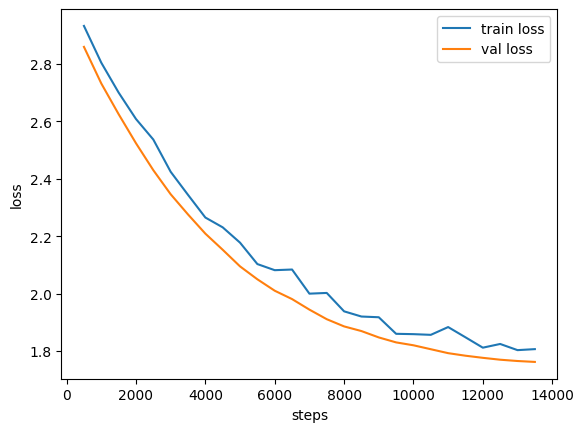

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



plt.plot(steps, train_loss)
plt.plot(steps, eval_loss)
plt.legend(["train loss", "val loss"], loc ="upper right")
plt.xlabel("steps")
plt.ylabel("loss")
plt.show()

## Inference

In [ ]:

import tqdm

def evaluate_without_truncation(texts):
  predictions_mean = []
  predictions_max = []
  for txt in tqdm.tqdm(texts):
    tokens = bert_tokenizer.encode_plus(txt,add_special_tokens=False, return_tensors='pt')
    input_id_chunks = tokens['input_ids'][0].split(510)
    mask_chunks = tokens['attention_mask'][0].split(510)

    input_id_chunks = list(input_id_chunks)
    mask_chunks = list(mask_chunks)
    logits = []
    for i in range(len(input_id_chunks)):
      input_id_chunks[i] = torch.cat([torch.Tensor([101]), input_id_chunks[i], torch.Tensor([102])])
      mask_chunks[i] = torch.cat([torch.Tensor([1]), mask_chunks[i], torch.Tensor([1])])

      # get required padding length
      pad_len = 512 - input_id_chunks[i].shape[0]
      # check if tensor length satisfies required chunk size
      if pad_len > 0:
          # if padding length is more than 0, we must add padding
          input_id_chunks[i] = torch.cat([
              input_id_chunks[i], torch.Tensor([0] * pad_len)
          ])
          mask_chunks[i] = torch.cat([
              mask_chunks[i], torch.Tensor([0] * pad_len)
      ])
    input_ids = torch.stack(input_id_chunks)
    attention_mask = torch.stack(mask_chunks)

    input_dict = {
        'input_ids': input_ids.long().cuda(),
        'attention_mask': attention_mask.int().cuda()
    }
    with torch.no_grad():
      outputs = model(**input_dict)

    # To transform these into output probabilities, we must apply a softmax function to the output tensor.
    probs = torch.nn.functional.softmax(outputs[0], dim=-1)


    ##  Agreggate

    # we take the mean or max of the values in each class (or column) to get our final positive, negative, or neutral sentiment probability.
    probs_mean = probs.mean(dim=0)
    probs_max = probs.max(dim=0).values



    winner_mean = torch.argmax(probs_mean).item()
    winner_max = torch.argmax(probs_max).item()
    predictions_mean.append(winner_mean)
    predictions_max.append(winner_max)

  return predictions_mean, predictions_max


In [ ]:
y_test_pred_mean, y_test_pred_max = evaluate_without_truncation(test_texts)


100%|██████████| 6000/6000 [03:38<00:00, 27.40it/s]


In [ ]:
test_accuracy_mean = accuracy_score(test_labels, y_test_pred_mean)
print("Test accuracy using mean: {}".format(test_accuracy_mean))

test_accuracy_max = accuracy_score(test_labels, y_test_pred_max)
print("Test accuracy using max: {}".format(test_accuracy_max))

Test accuracy using mean: 0.5141666666666667
Test accuracy using max: 0.5058333333333334


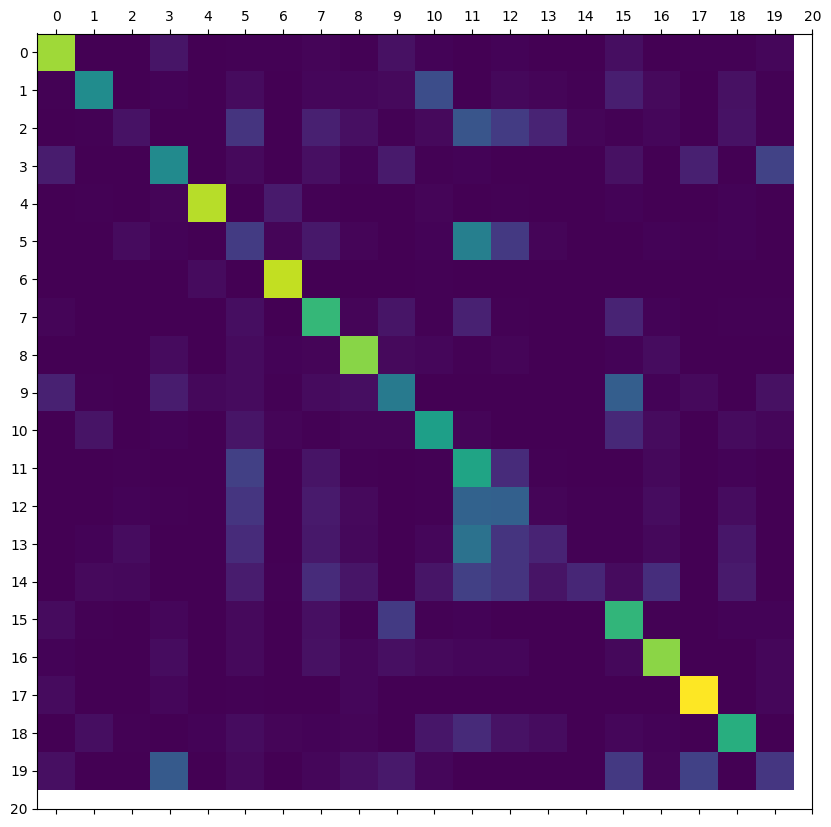

In [ ]:
cm = confusion_matrix(test_labels, y_test_pred_mean)
plot_confusion_matrix(cm)

In [ ]:
id2label

{0: 'talk.politics.mideast',
 1: 'rec.autos',
 2: 'comp.sys.mac.hardware',
 3: 'alt.atheism',
 4: 'rec.sport.baseball',
 5: 'comp.os.ms-windows.misc',
 6: 'rec.sport.hockey',
 7: 'sci.crypt',
 8: 'sci.med',
 9: 'talk.politics.misc',
 10: 'rec.motorcycles',
 11: 'comp.windows.x',
 12: 'comp.graphics',
 13: 'comp.sys.ibm.pc.hardware',
 14: 'sci.electronics',
 15: 'talk.politics.guns',
 16: 'sci.space',
 17: 'soc.religion.christian',
 18: 'misc.forsale',
 19: 'talk.religion.misc'}